<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/Assignments/Assignment%202./assignment_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

Hi there! In this assignment, you will use neural networks (or something else, if you want) to predict values in a regression problem.

To get you started, I have provided a complete working example, which is decent but not very impressive.

Data is available from Kaggle: https://www.kaggle.com/t/8189b803613d49d7b2021f7f705159ab  where you can also submit your predictions when you are done. The metric used to score this assignment is root mean squared error. 

# Hints to get a good model

Be sure to construct a validation set and use it to optimize the parameters of your model.

Be sure to scale your data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)

In [ ]:
# Load data (must be in same folder as this file, which it will be if you simply unzip the assignment).
# Note that we don't have any y_test! This way you cannot "cheat"!

X_train = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 2./data/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 2./data/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 2./data/y_train.npy')

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state = seed)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape)

(32000, 84) (8000, 84) (10000, 84) (32000,) (8000,)


In [ ]:
def build_model(size,
                activation,
                weight_regularizer,
                dropout,
                batch_norm):
  
  layers = [tf.keras.layers.Flatten(input_shape = (84,))]
    
  number_of_layers = size
  number_of_neurons = size ** 2 * 4
    
  for i in range(number_of_layers):
    layers.append(tf.keras.layers.Dense(number_of_neurons,
                                        activation = activation,
                                        kernel_regularizer = weight_regularizer))
    if batch_norm:
      layers.append(tf.keras.layers.BatchNormalization())
        
    if dropout:
      layers.append(tf.keras.layers.Dropout(0.1))

  layers.append(tf.keras.layers.Dense(1, activation = 'linear'))
    
  model = tf.keras.models.Sequential(layers)
    
  model.compile(
      loss = 'mse',
      optimizer = 'adam',
      metrics = ['mae'])
    
  return model


def plot_histories(histories,
                   names,
                   measure,
                   xlim_max = 20,
                   ylim_min = 0,
                   ylim_max = 0):
  
  measure_to_pretty = {'loss': 'loss',
                       'mae': 'mae'}
  
  number_of_histories = len(histories)
  
  fig = plt.figure(figsize = plt.figaspect(0.05 * number_of_histories))
    
  for i in range(number_of_histories):
    ax = fig.add_subplot(1, number_of_histories, i + 1)
    
    ax.plot(histories[i].history[f'val_{measure}'],
            label = f'Test {measure_to_pretty[measure]}, {names[i]}')
    
    ax.plot(histories[i].history[f'{measure}'],
            label = f'Train {measure_to_pretty[measure]}, {names[i]}')
    
    plt.xlabel('Epoch')
    plt.ylabel(measure)
    
    plt.legend()
    plt.xlim(0, xlim_max)
    plt.ylim(ylim_min, ylim_max)
    
    #plt.gca().set_aspect('equal', adjustable = 'box')
    plt.draw()

  plt.show()

In [ ]:
model_baseline = build_model(15, 'relu', None, False, False)

history_baseline = model_baseline.fit(X_train,
                                      y_train,
                                      validation_data = (X_val, y_val),
                                      epochs = 15)

Epoch 1/15
1000/1000 [==============================] - 8s 7ms/step - loss: 1.0290 - mae: 0.2306 - val_loss: 94.6352 - val_mae: 9.7145
Epoch 2/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0202 - mae: 0.0973 - val_loss: 28.9622 - val_mae: 5.3733
Epoch 3/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0184 - mae: 0.0906 - val_loss: 10.5050 - val_mae: 3.2349
Epoch 4/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0168 - mae: 0.0857 - val_loss: 6.1425 - val_mae: 2.4715
Epoch 5/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0156 - mae: 0.0820 - val_loss: 2.8822 - val_mae: 1.6886
Epoch 6/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0147 - mae: 0.0781 - val_loss: 2.1398 - val_mae: 1.4538
Epoch 7/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0149 - mae: 0.0793 - val_loss: 0.2161 - val_mae: 0.4397
Epoch 8/15
1000/1000 [==============================] - 6s 

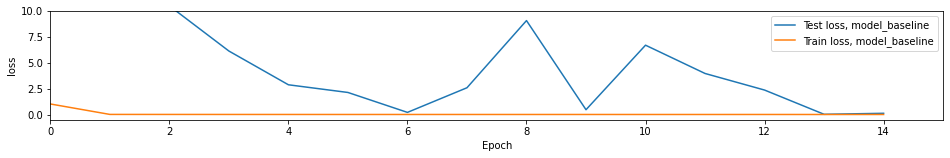

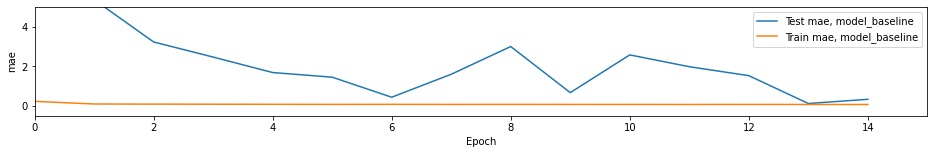

In [ ]:
plot_histories(histories = [history_baseline],
               names = ['model_baseline'],
               measure = 'loss',
               xlim_max = 15,
               ylim_min = -0.5,
               ylim_max = 10)

plot_histories(histories = [history_baseline],
               names = ['model_baseline'],
               measure = 'mae',
               xlim_max = 15,
               ylim_min = -0.5,
               ylim_max = 5)

The below code makes predictions and then saves them (after checking they are in correct format).

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_early = build_model(15, 'relu', None, False, False)

history_early = model_early.fit(X_train,
                                y_train,
                                validation_data = (X_val, y_val),
                                epochs = 10,
                                callbacks = [early_stopping])

Epoch 1/10
1000/1000 [==============================] - 10s 7ms/step - loss: 4.4407 - mae: 0.2418 - val_loss: 66.7944 - val_mae: 8.1617
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0209 - mae: 0.0993 - val_loss: 18.8171 - val_mae: 4.3303
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0198 - mae: 0.0945 - val_loss: 8.4618 - val_mae: 2.9016
Epoch 4/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0179 - mae: 0.0878 - val_loss: 3.4635 - val_mae: 1.8530
Epoch 5/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0171 - mae: 0.0860 - val_loss: 0.6254 - val_mae: 0.7740
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0162 - mae: 0.0832 - val_loss: 0.6660 - val_mae: 0.8013
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0159 - mae: 0.0817 - val_loss: 0.1321 - val_mae: 0.3393
Epoch 8/10
1000/1000 [==============================] - 6s 

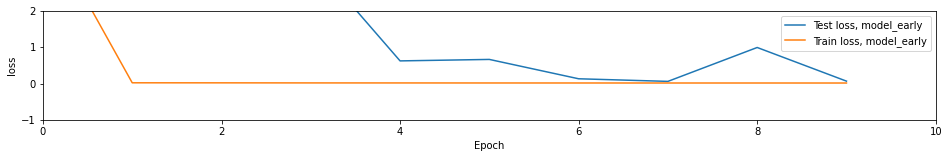

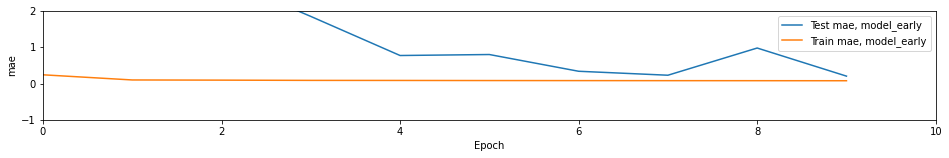

In [ ]:
plot_histories(histories = [history_early],
               names = ['model_early'],
               measure = 'loss',
               xlim_max = 10,
               ylim_min = -1,
               ylim_max = 2)

plot_histories(histories = [history_early],
               names = ['model_early'],
               measure = 'mae',
               xlim_max = 10,
               ylim_min = -1,
               ylim_max = 2)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_regularized = build_model(15, 'relu', tf.keras.regularizers.l2(0.0001), False, False)

history_regularized = model_regularized.fit(X_train,
                                            y_train,
                                            validation_data = (X_val, y_val),
                                            epochs = 20,
                                            callbacks = [early_stopping])

Epoch 1/20
1000/1000 [==============================] - 9s 8ms/step - loss: 5.2794 - mae: 0.2367 - val_loss: 81.3122 - val_mae: 8.9778
Epoch 2/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5214 - mae: 0.1010 - val_loss: 23.5973 - val_mae: 4.8001
Epoch 3/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4901 - mae: 0.1007 - val_loss: 16.8251 - val_mae: 4.0389
Epoch 4/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4597 - mae: 0.0956 - val_loss: 12.5705 - val_mae: 3.4757
Epoch 5/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4296 - mae: 0.0924 - val_loss: 3.4542 - val_mae: 1.7394
Epoch 6/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3991 - mae: 0.0898 - val_loss: 6.2140 - val_mae: 2.4113
Epoch 7/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3672 - mae: 0.0885 - val_loss: 1.8368 - val_mae: 1.2153
Epoch 8/20
1000/1000 [==============================] - 8s

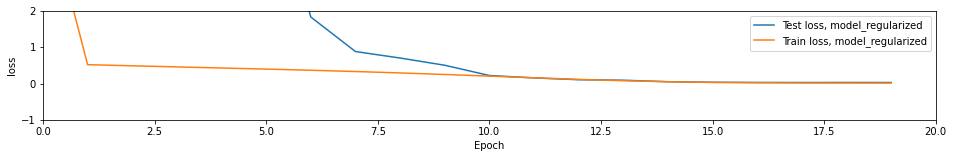

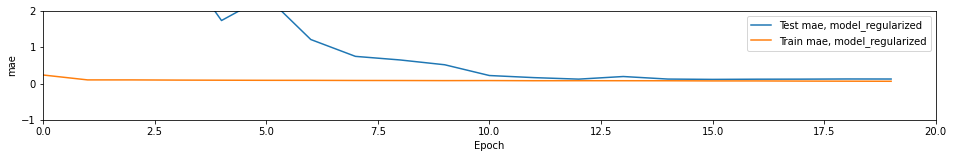

In [ ]:
plot_histories(histories = [history_regularized],
               names = ['model_regularized'],
               measure = 'loss',
               xlim_max = 20,
               ylim_min = -1,
               ylim_max = 2)

plot_histories(histories = [history_regularized],
               names = ['model_regularized'],
               measure = 'mae',
               xlim_max = 20,
               ylim_min = -1,
               ylim_max = 2)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_dropout = build_model(15, 'relu', tf.keras.regularizers.l2(0.0001), True, False)

history_dropout = model_dropout.fit(X_train,
                                    y_train,
                                    validation_data = (X_val, y_val),
                                    epochs = 20,
                                    callbacks = [early_stopping])

Epoch 1/20
1000/1000 [==============================] - 10s 8ms/step - loss: 1.9160 - mae: 0.2348 - val_loss: 23.4718 - val_mae: 4.7656
Epoch 2/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.6825 - mae: 0.1339 - val_loss: 7.6716 - val_mae: 2.6518
Epoch 3/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5944 - mae: 0.1207 - val_loss: 4.8654 - val_mae: 2.0757
Epoch 4/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5167 - mae: 0.1116 - val_loss: 1.9529 - val_mae: 1.2133
Epoch 5/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4449 - mae: 0.1068 - val_loss: 0.8117 - val_mae: 0.6334
Epoch 6/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3752 - mae: 0.1023 - val_loss: 1.2212 - val_mae: 0.9368
Epoch 7/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3084 - mae: 0.0995 - val_loss: 0.3946 - val_mae: 0.3489
Epoch 8/20
1000/1000 [==============================] - 8s 8

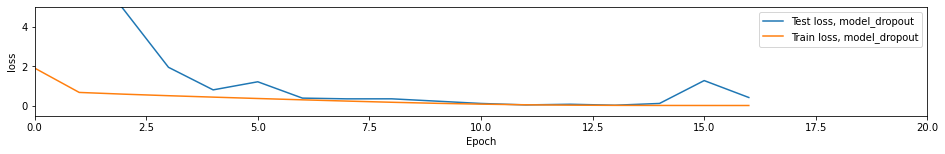

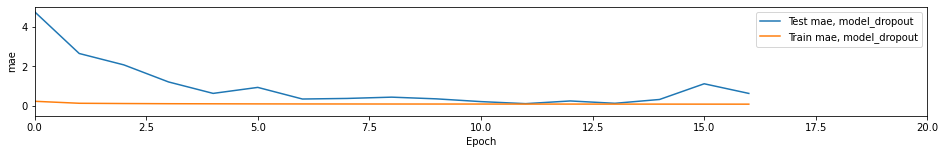

In [ ]:
plot_histories(histories = [history_dropout],
               names = ['model_dropout'],
               measure = 'loss',
               xlim_max = 20,
               ylim_min = -0.5,
               ylim_max = 5)

plot_histories(histories = [history_dropout],
               names = ['model_dropout'],
               measure = 'mae',
               xlim_max = 20,
               ylim_min = -0.5,
               ylim_max = 5)

In [ ]:
y_test_hat = model_dropout.predict(X_test)

y_test_hat_pd = pd.DataFrame({
    'Id': list(range(10000)),
    'Predicted': y_test_hat.reshape(-1),
})

313/313 [==============================] - 1s 2ms/step


In [ ]:
assert isinstance(y_test_hat_pd, pd.DataFrame)
assert all(y_test_hat_pd.columns == ['Id', 'Predicted'])
assert len(y_test_hat_pd) == 10000

# If you pass the checks, the file is saved.
y_test_hat_pd.to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 2./y_test_hat.csv', index = False)